<a href="https://colab.research.google.com/github/ntust10733033/BRF_PriceCalculation/blob/master/%E5%85%B1%E6%95%B4%E5%90%88_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
!pip install arch

In [255]:
!pip install scipy -U

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)


In [256]:
!pip install matplotlib -U

     |████████████████████████████████| 10.3MB 5.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [257]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [277]:
import seaborn as sns

In [258]:
import pandas as pd

In [259]:
from arch.unitroot import ADF,KPSS
import numpy as np

In [260]:
from scipy import stats

In [261]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BRF_RawData/df_2mon.csv",encoding='big5')

In [262]:
df

,Unnamed: 0,交易日期,到期月份(週別),收盤價,交易年分,原日期,到期年份(週別)
0,0,7,9,2381.5,2018,2018-07-02,2018
1,5,7,9,2377.0,2018,2018-07-03,2018
2,10,7,9,2381.5,2018,2018-07-04,2018
3,15,7,9,2369.5,2018,2018-07-05,2018
4,20,7,9,2361.0,2018,2018-07-06,2018
...,...,...,...,...,...,...,...
594,3074,12,2,1384.0,2020,2020-12-23,2021
595,3079,12,2,1449.0,2020,2020-12-24,2021
596,3084,12,2,1427.5,2020,2020-12-25,2021
597,3089,12,2,1436.5,2020,2020-12-28,2021


In [263]:
del df['Unnamed: 0']
df.columns = ['交易月份','到期月份','收盤價','交易年分','原日期','到期年分']

In [264]:
df.index = df['原日期']

In [265]:
df = df.drop(columns=['原日期'],axis=1)

In [266]:
df.index = pd.to_datetime(df.index)

In [267]:
df['週別'] = df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [268]:
df = df.astype(str)

In [269]:
df['week'] = df['交易年分'].map(str)+df['週別']
df.head()

,交易月份,到期月份,收盤價,交易年分,到期年分,週別,week
原日期,,,,,,,
2018-07-02,7,9,2381.5,2018,2018,27,201827
2018-07-03,7,9,2377.0,2018,2018,27,201827
2018-07-04,7,9,2381.5,2018,2018,27,201827
2018-07-05,7,9,2369.5,2018,2018,27,201827
2018-07-06,7,9,2361.0,2018,2018,27,201827


In [270]:
#df.to_csv('週別.csv',encoding='big5')
df.loc['2020-10']

,交易月份,到期月份,收盤價,交易年分,到期年分,週別,week
原日期,,,,,,,
2020-10-05,10,12,1158.5,2020,2020,41,202041
2020-10-06,10,12,1187.0,2020,2020,41,202041
2020-10-07,10,12,1208.5,2020,2020,41,202041
2020-10-08,10,12,1206.5,2020,2020,41,202041
2020-10-12,10,12,1210.0,2020,2020,42,202042
2020-10-13,10,12,1197.0,2020,2020,42,202042
2020-10-14,10,12,1206.0,2020,2020,42,202042
2020-10-15,10,12,1242.0,2020,2020,42,202042
2020-10-16,10,12,1224.0,2020,2020,42,202042


In [271]:
#filter1 = df['交易月份']==1
#filter2 = df['交易年分']==2019

In [272]:
df['收盤價'] = df['收盤價'].astype(float)

In [273]:
#x = df[filter1 & filter2]['收盤價']
x = df['2019-01':'2019-04']['收盤價']
#x = df['2019-01']['收盤價']
x
#x = df[filter2]['收盤價']

原日期
2019-01-02    1630.0
2019-01-03    1672.5
2019-01-04    1725.5
2019-01-07    1772.0
2019-01-08    1766.5
               ...  
2019-04-24    2289.0
2019-04-25    2301.0
2019-04-26    2290.0
2019-04-29    2217.5
2019-04-30    2220.0
Name: 收盤價, Length: 73, dtype: float64

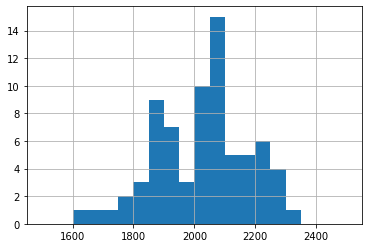

In [274]:
x.hist(bins=20,range=(1500,2500))


In [275]:
mrange_2018 = (1000,3000)
mrange_2019 = (1500,2500)
mrange_2020 = (0,2500)
mbin = 30

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2020-10:2020-12')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  y = round(y + yo + yd)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30436 missing from current font.
  y = round(y + yo + yd)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  y = round(y + yo + yd)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25910 missing from current font.
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30436 missing from current font.
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20729 missing from current font.
  


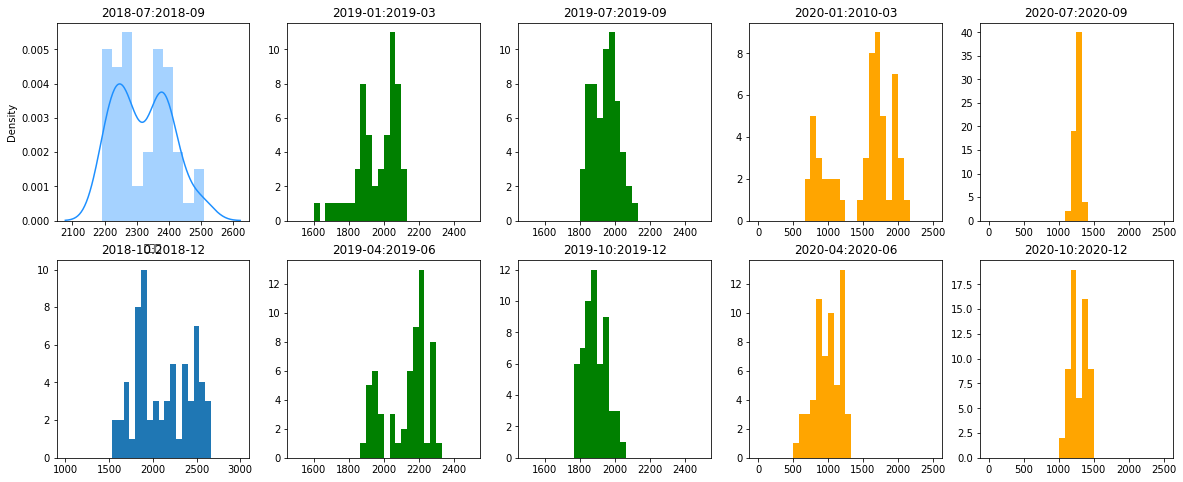

In [289]:
#,sharex=True,sharey=True
fig,axs = plt.subplots(nrows=2,ncols=5,figsize=(20,8))
#axs[0,0].hist(df['2018-07':'2018-09']['收盤價'],density=True,bins=100,range=mrange_2018)
axs[0,0].set_title("2018-07:2018-09")
sns.distplot(df['2018-07':'2018-09']['收盤價'],bins=10,ax=axs[0,0],color="dodgerblue")
axs[1,0].hist(df['2018-10':'2018-12']['收盤價'],bins=mbin,range=mrange_2018)
axs[1,0].set_title("2018-10:2018-12")
axs[0,1].hist(df['2019-01':'2019-03']['收盤價'],bins=mbin,range=mrange_2019,color='green')
axs[0,1].set_title("2019-01:2019-03")
axs[1,1].hist(df['2019-04':'2019-06']['收盤價'],bins=mbin,range=mrange_2019,color='green')
axs[1,1].set_title("2019-04:2019-06")
axs[0,2].hist(df['2019-07':'2019-09']['收盤價'],bins=mbin,range=mrange_2019,color='green')
axs[0,2].set_title("2019-07:2019-09")
axs[1,2].hist(df['2019-10':'2019-12']['收盤價'],bins=mbin,range=mrange_2019,color='green')
axs[1,2].set_title("2019-10:2019-12")
axs[0,3].hist(df['2020-01':'2020-03']['收盤價'],bins=mbin,range=mrange_2020,color='orange')
axs[0,3].set_title("2020-01:2010-03")
axs[1,3].hist(df['2020-04':'2020-06']['收盤價'],bins=mbin,range=mrange_2020,color='orange')
axs[1,3].set_title("2020-04:2020-06")
axs[0,4].hist(df['2020-07':'2020-09']['收盤價'],bins=mbin,range=mrange_2020,color='orange')
axs[0,4].set_title("2020-07:2020-09")
axs[1,4].hist(df['2020-10':'2020-12']['收盤價'],bins=mbin,range=mrange_2020,color='orange')
axs[1,4].set_title("2020-10:2020-12")

In [198]:
y1 = df[df['交易年分']=='2018']['收盤價']
y2 = df[df['交易年分']=='2019']['收盤價']
y3 = df[df['交易年分']=='2020']['收盤價']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


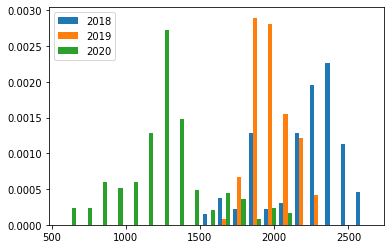

In [199]:
plt.hist([y1,y2,y3],bins=20,label=['2018','2019','2020'],density=True)
plt.legend(loc='upper left')

# 單根檢定

In [200]:
CPC_df = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/BRF_RawData/中油95_201807_202104.xlsx")

In [201]:
CPC_df = CPC_df.iloc[:30]
CPC_df = CPC_df['數值']

In [202]:
mon_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/BRF_RawData/BRF月均價 - 工作表1.csv")


In [203]:
mon_df = mon_df['每公升價格']

In [204]:
mon_df

0     14.432399
1     14.236166
2     15.211208
3     15.675209
4     12.931279
5     11.178790
6     11.581039
7     12.594620
8     12.984685
9     13.903295
10    13.860026
11    12.353363
12    12.591343
13    11.828485
14    12.234344
15    11.481750
16    11.923329
17    12.301205
18    12.311181
19    10.630607
20     6.599584
21     5.106068
22     6.052370
23     7.541011
24     7.973155
25     8.297833
26     7.702445
27     7.475605
28     7.787534
29     8.821609
Name: 每公升價格, dtype: float64

In [205]:
mon_list=['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
          '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
          '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']


In [206]:
df = pd.concat([pd.DataFrame(mon_list),mon_df.rename('BRF'),CPC_df.rename('CPC95')],axis=1,ignore_index=True)

In [207]:
df.columns=['mon_list','BRF','CPC95']

In [208]:
df = df.set_index('mon_list')

In [209]:
df.head(5)

,BRF,CPC95
mon_list,,
2018-07,14.432399,30.3
2018-08,14.236166,30.3
2018-09,15.211208,31.0
2018-10,15.675209,31.0
2018-11,12.931279,28.4


In [210]:
#df.to_csv('BRF_CPC95_每公升月均價.csv',encoding='big5')

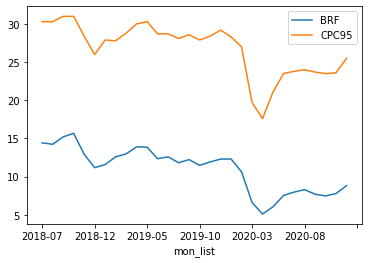

In [211]:
df.plot()

BRF跟中油95 (價格/公升)=>看起來趨勢一致


In [212]:
CPCf = df['CPC95']
BRFf = df['BRF']

In [213]:
CPCf_log = np.log(CPCf)
BRFf_log = np.log(BRFf) 

In [214]:
adf_CPC = ADF(CPCf_log)
adf_BRF = ADF(BRFf_log)

In [215]:
print(adf_BRF.summary(),adf_CPC.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.481
P-value                         0.543
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.    Augmented Dickey-Fuller Results   
Test Statistic                 -2.451
P-value                         0.128
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.69 (1%), -2.97 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


無法拒絕虛無假說=>存在單根=>兩者的對數價格皆為非定態，有一定的趨勢


In [216]:
#要取[1:]是因為第一項不存在於前一項的差分，會變成NaN
ret_CPC = CPCf_log.diff()[1:]
ret_BRF = BRFf_log.diff()[1:]

In [217]:
adf_ret_CPC = ADF(ret_CPC)
adf_ret_BRF = ADF(ret_BRF)
print(adf_ret_BRF.summary(),adf_ret_CPC.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.776
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.    Augmented Dickey-Fuller Results   
Test Statistic                 -4.604
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


拒絕虛無假說=>不存在單根=>兩者差分(一階整合序列)皆為定態

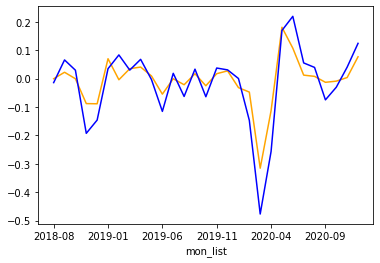

In [218]:
ret_CPC.plot(label='CPC95',style='orange')
ret_BRF.plot(label='BRF',style='blue')

# 共整合
在了解對數價格的差分序列是定態後，再來看是否存在共整合
=>看兩者對數價格差是否為定態


$log(P^Y_{t}) = \alpha +\beta \space log(P^X_{t})+\varepsilon_{t}$

$\rightarrow \varepsilon_{t} = log(P^Y_{t})-\alpha -\beta \space log(P^X_{t}) $

檢定一下$\varepsilon_{t}$是否為定態

In [219]:
import statsmodels.api as sm

In [220]:
model =sm.OLS(CPCf_log,sm.add_constant(BRFf_log))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  CPC95   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     574.5
Date:                Sun, 16 May 2021   Prob (F-statistic):           3.35e-20
Time:                        10:14:08   Log-Likelihood:                 63.074
No. Observations:                  30   AIC:                            -122.1
Df Residuals:                      28   BIC:                            -119.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1983      0.045     48.438      0.0

In [221]:
alpha,beta = result.params
alpha,beta

(2.1983454451516833, 0.4579678324923272)

$log(P^{中油95}_{t}) = 2.198 +0.458 \space log(P^{BRF}_{t})+\varepsilon_{t}$

In [222]:
spread = CPCf_log -beta*BRFf_log - alpha
spread

mon_list
2018-07   -0.009732
2018-08   -0.003462
2018-09   -0.010962
2018-10   -0.024723
2018-11   -0.024193
2018-12   -0.045792
2019-01    0.008549
2019-02   -0.033465
2019-03   -0.012095
2019-04   -0.002244
2019-05    0.008801
2019-06    0.007253
2019-07   -0.001485
2019-08    0.006010
2019-09    0.008197
2019-10    0.012492
2019-11    0.012972
2019-12    0.026463
2020-01   -0.005215
2020-02    0.014976
2020-03   -0.081915
2020-04   -0.077131
2020-05    0.026379
2020-06    0.033397
2020-07    0.020562
2020-08    0.010651
2020-09    0.032171
2020-10    0.037386
2020-11    0.022911
2020-12    0.043243
dtype: float64

(-0.2, 0.2)

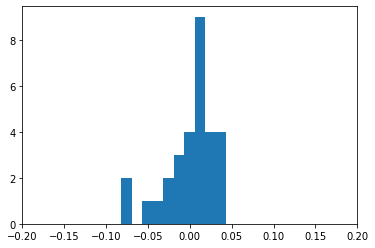

In [223]:
plt.hist(spread)
plt.xlim((-0.2,0.2))

In [224]:
stats.normaltest(spread)

NormaltestResult(statistic=10.044316720859849, pvalue=0.00659028713280423)

In [225]:
adfSpread = ADF(spread,trend='nc')
print(adfSpread.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.194
P-value                         0.001
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.65 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.7/dist-packages/arch/unitroot/unitroot.py:470: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  FutureWarning,


拒絕虛無假說=>對數價格差存在定態，有共整合
